In [1]:
'''
This is a example simulation from the smcpy package
'''

'\nThis is a example simulation from the smcpy package\n'

t: 20 | ess:   357.19 | mut. ratio: 98.0% | resample: False |: 100%|██████████| 19/19 [00:12<00:00,  1.54it/s]


marginal log likelihood = -222.3080648198989
parameter means = {'a': 1.9957513080683666, 'b': 4.014643119180178}


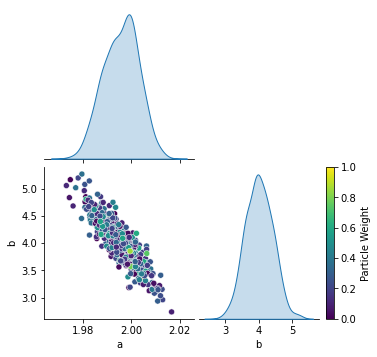

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

from scipy.stats import uniform

from smcpy.mcmc.vector_mcmc import VectorMCMC
from smcpy.mcmc.vector_mcmc_kernel import VectorMCMCKernel
from smcpy.samplers import FixedSampler as Sampler
from smcpy.utils.plotter import *


TRUE_PARAMS = np.array([[2, 3.5]])
TRUE_STD = 2

def eval_model(theta):
    time.sleep(0.1) # artificial slowdown to show off progress bar
    a = theta[:, 0, None]
    b = theta[:, 1, None]
    return a * np.arange(100) + b


def generate_data(eval_model, plot=True):
    y_true = eval_model(TRUE_PARAMS)
    noisy_data = y_true + np.random.normal(0, TRUE_STD, y_true.shape)
    if plot:
        plot_noisy_data(x, y_true, noisy_data)
    return noisy_data


def plot_noisy_data(x, y_true, noisy_data):
    fig, ax = plt.subplots(1)
    ax.plot(x.flatten(), y_true.flatten(), '-k')
    ax.plot(x.flatten(), noisy_data.flatten(), 'o')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


if __name__ == '__main__':

    np.random.seed(200)

    num_smc_steps = 20
    std_dev = 2
    noisy_data = generate_data(eval_model, plot=False)

    priors = [uniform(0., 6.), uniform(0., 6.)]
    vector_mcmc = VectorMCMC(eval_model, noisy_data, priors, std_dev)
    mcmc_kernel = VectorMCMCKernel(vector_mcmc, param_order=('a', 'b'))

    smc = Sampler(mcmc_kernel)
    phi_seq = np.linspace(0, 1, num_smc_steps)
    step_list, mll_list = smc.sample(num_particles=500, num_mcmc_samples=5,
                                     ess_threshold=0.7, phi_sequence=phi_seq)
    print('marginal log likelihood = {}'.format(mll_list[-1]))
    print('parameter means = {}'.format(step_list[-1].compute_mean()))

    plot_pairwise(step_list[-1].params, step_list[-1].weights,
                  param_names=['a', 'b'])